# Class-09, June 3rd, Cross-validation- Grid Search- hyperparameter optimization 

Hossen Teimoorinia, Uvic, 2023

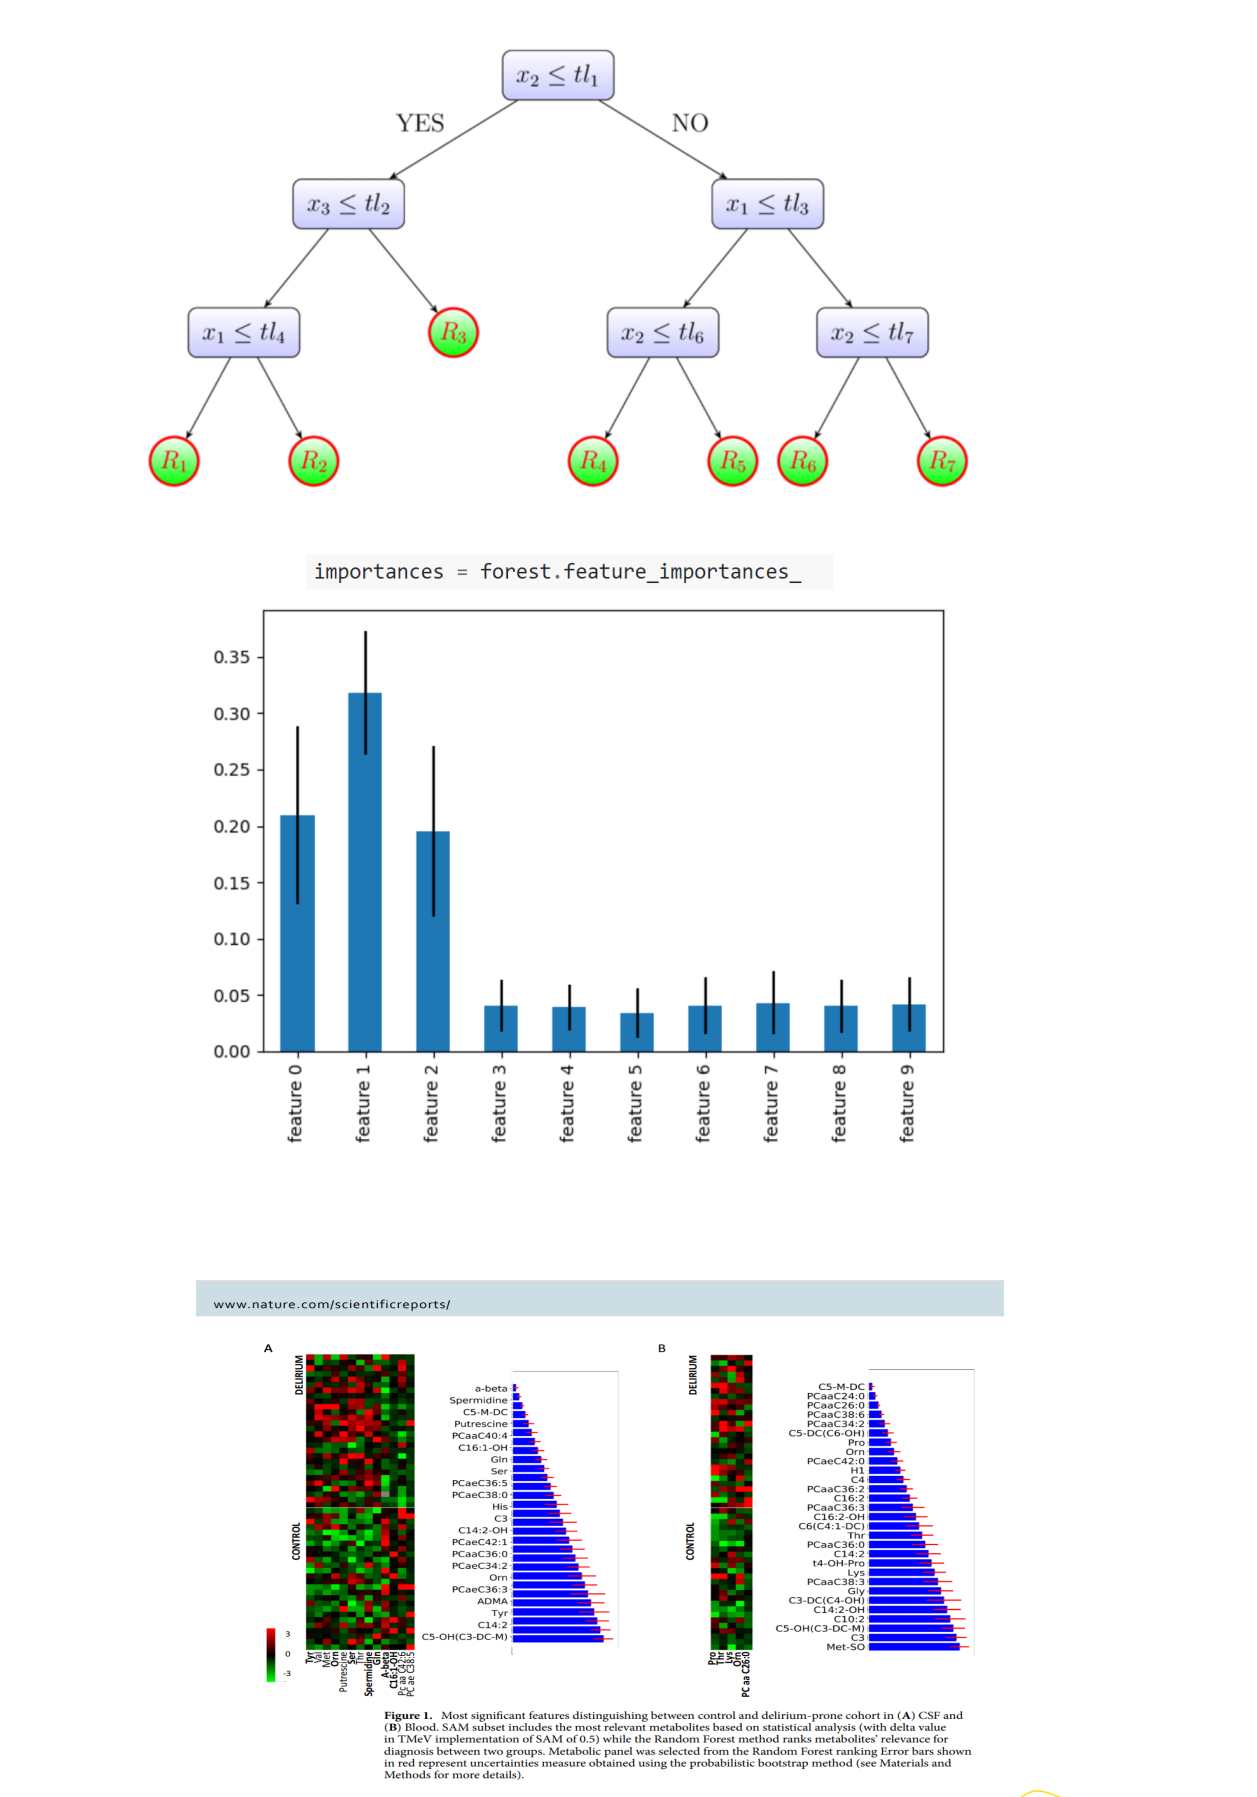

# Data split? Why?
# -----------------------------------------------------------------------------------
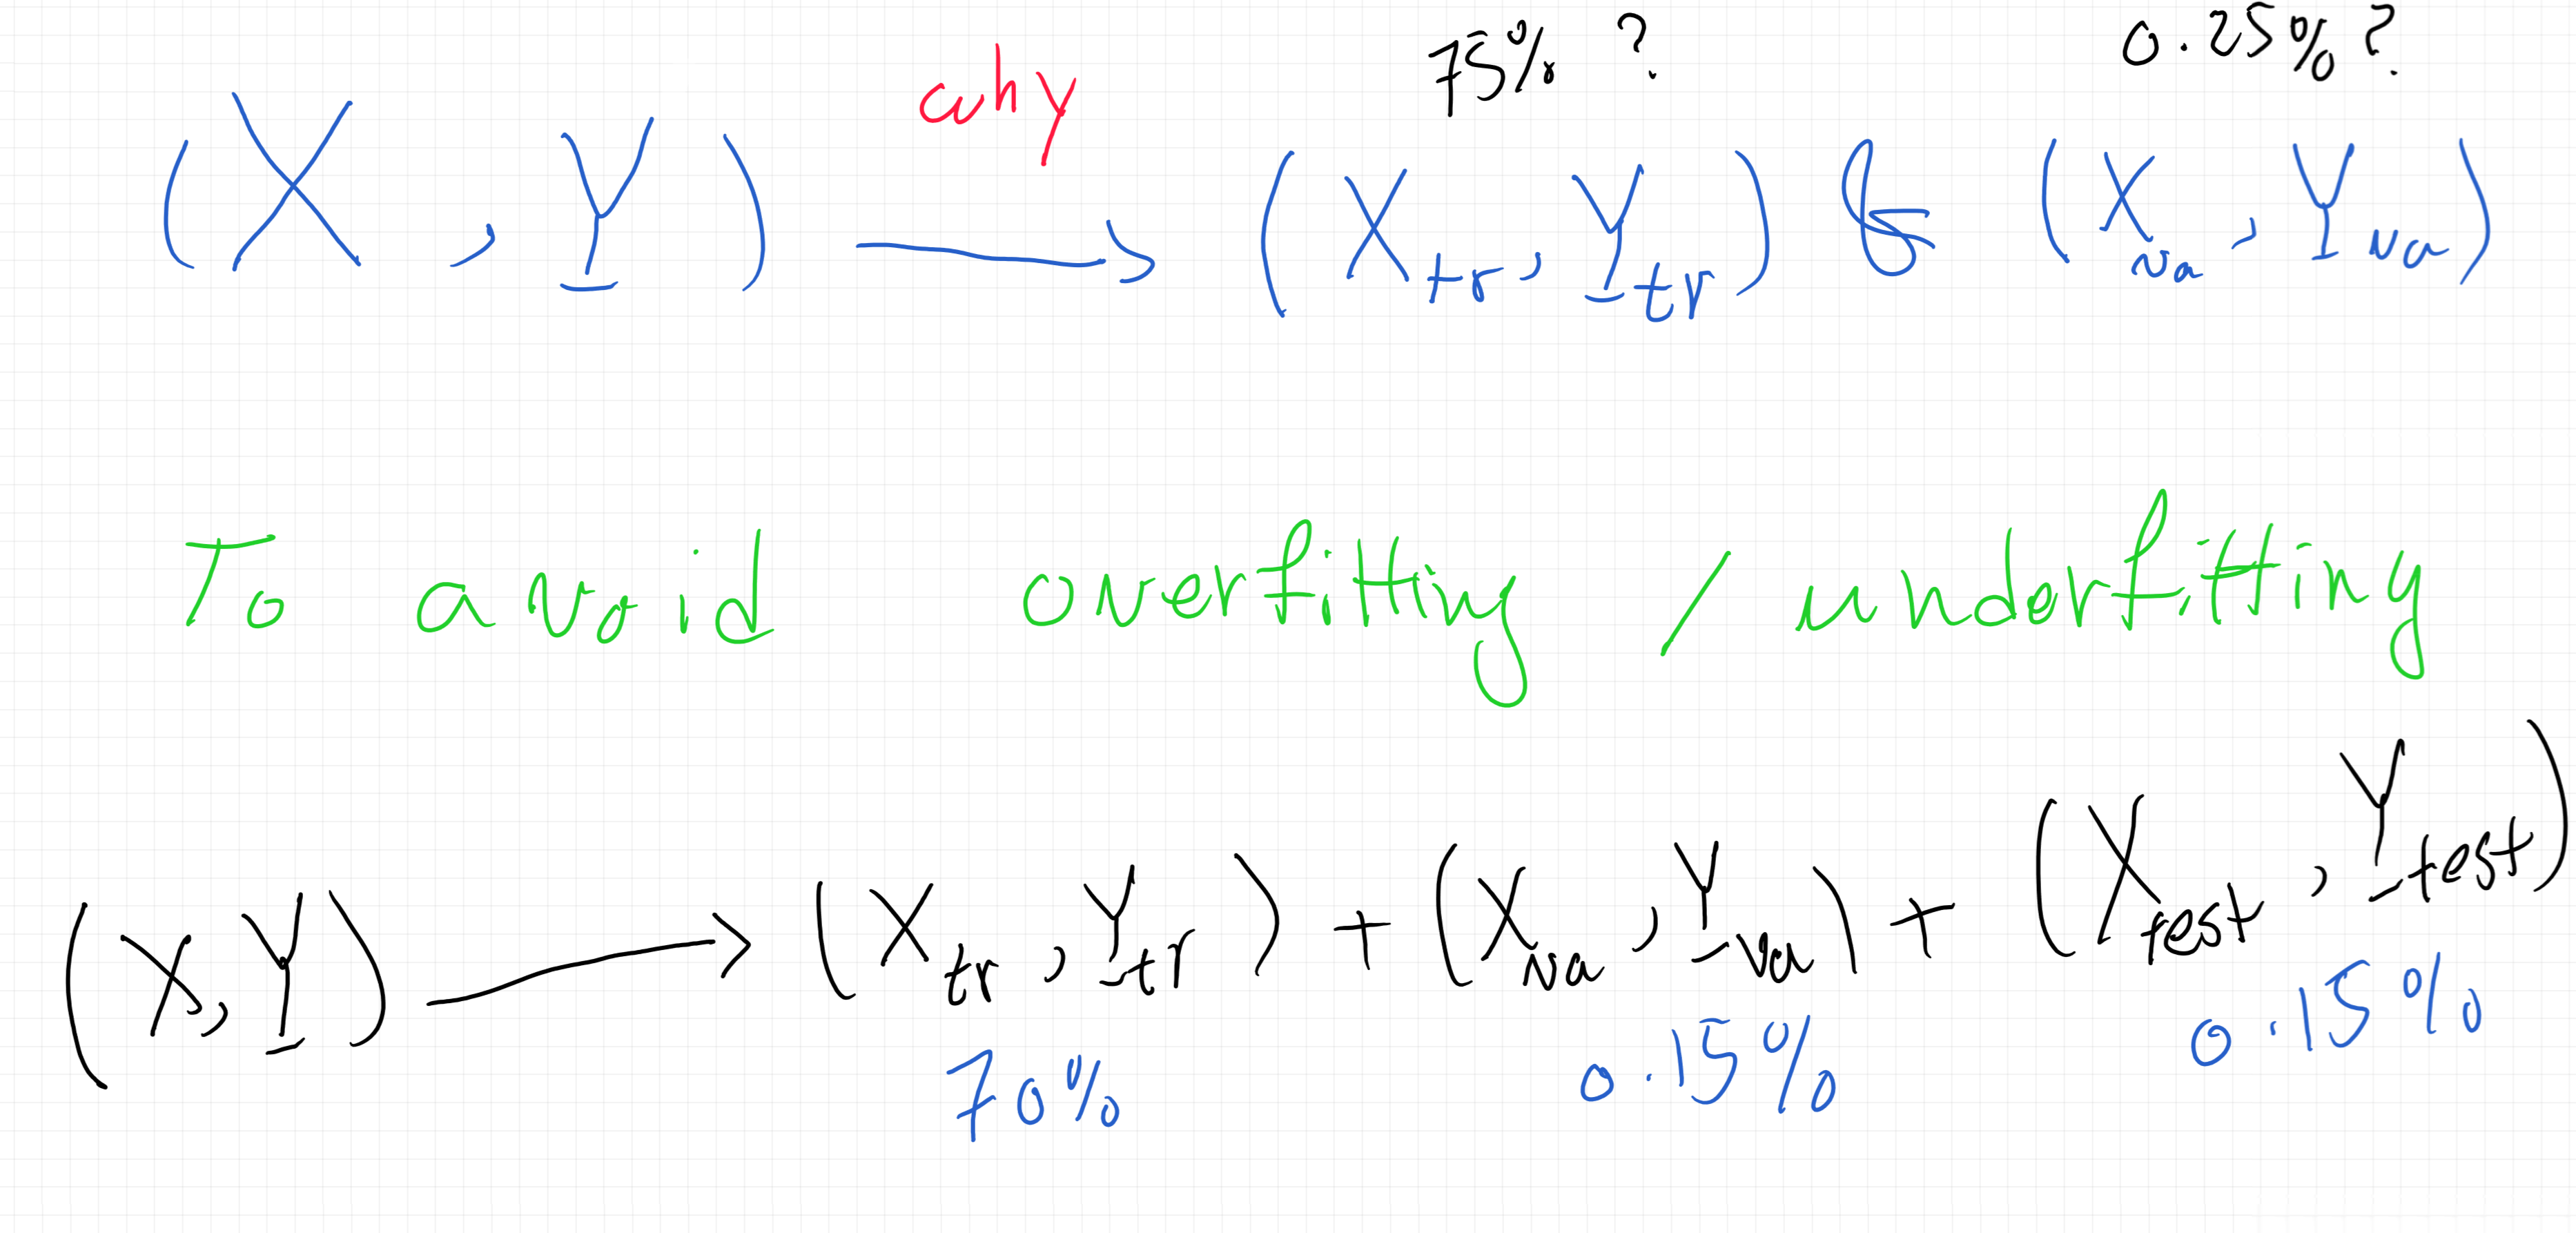
# -----------------------------------------------------------------------------------

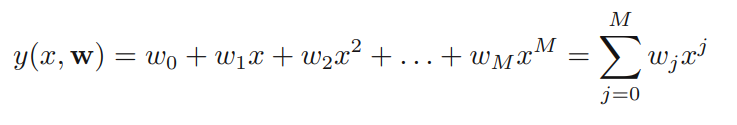
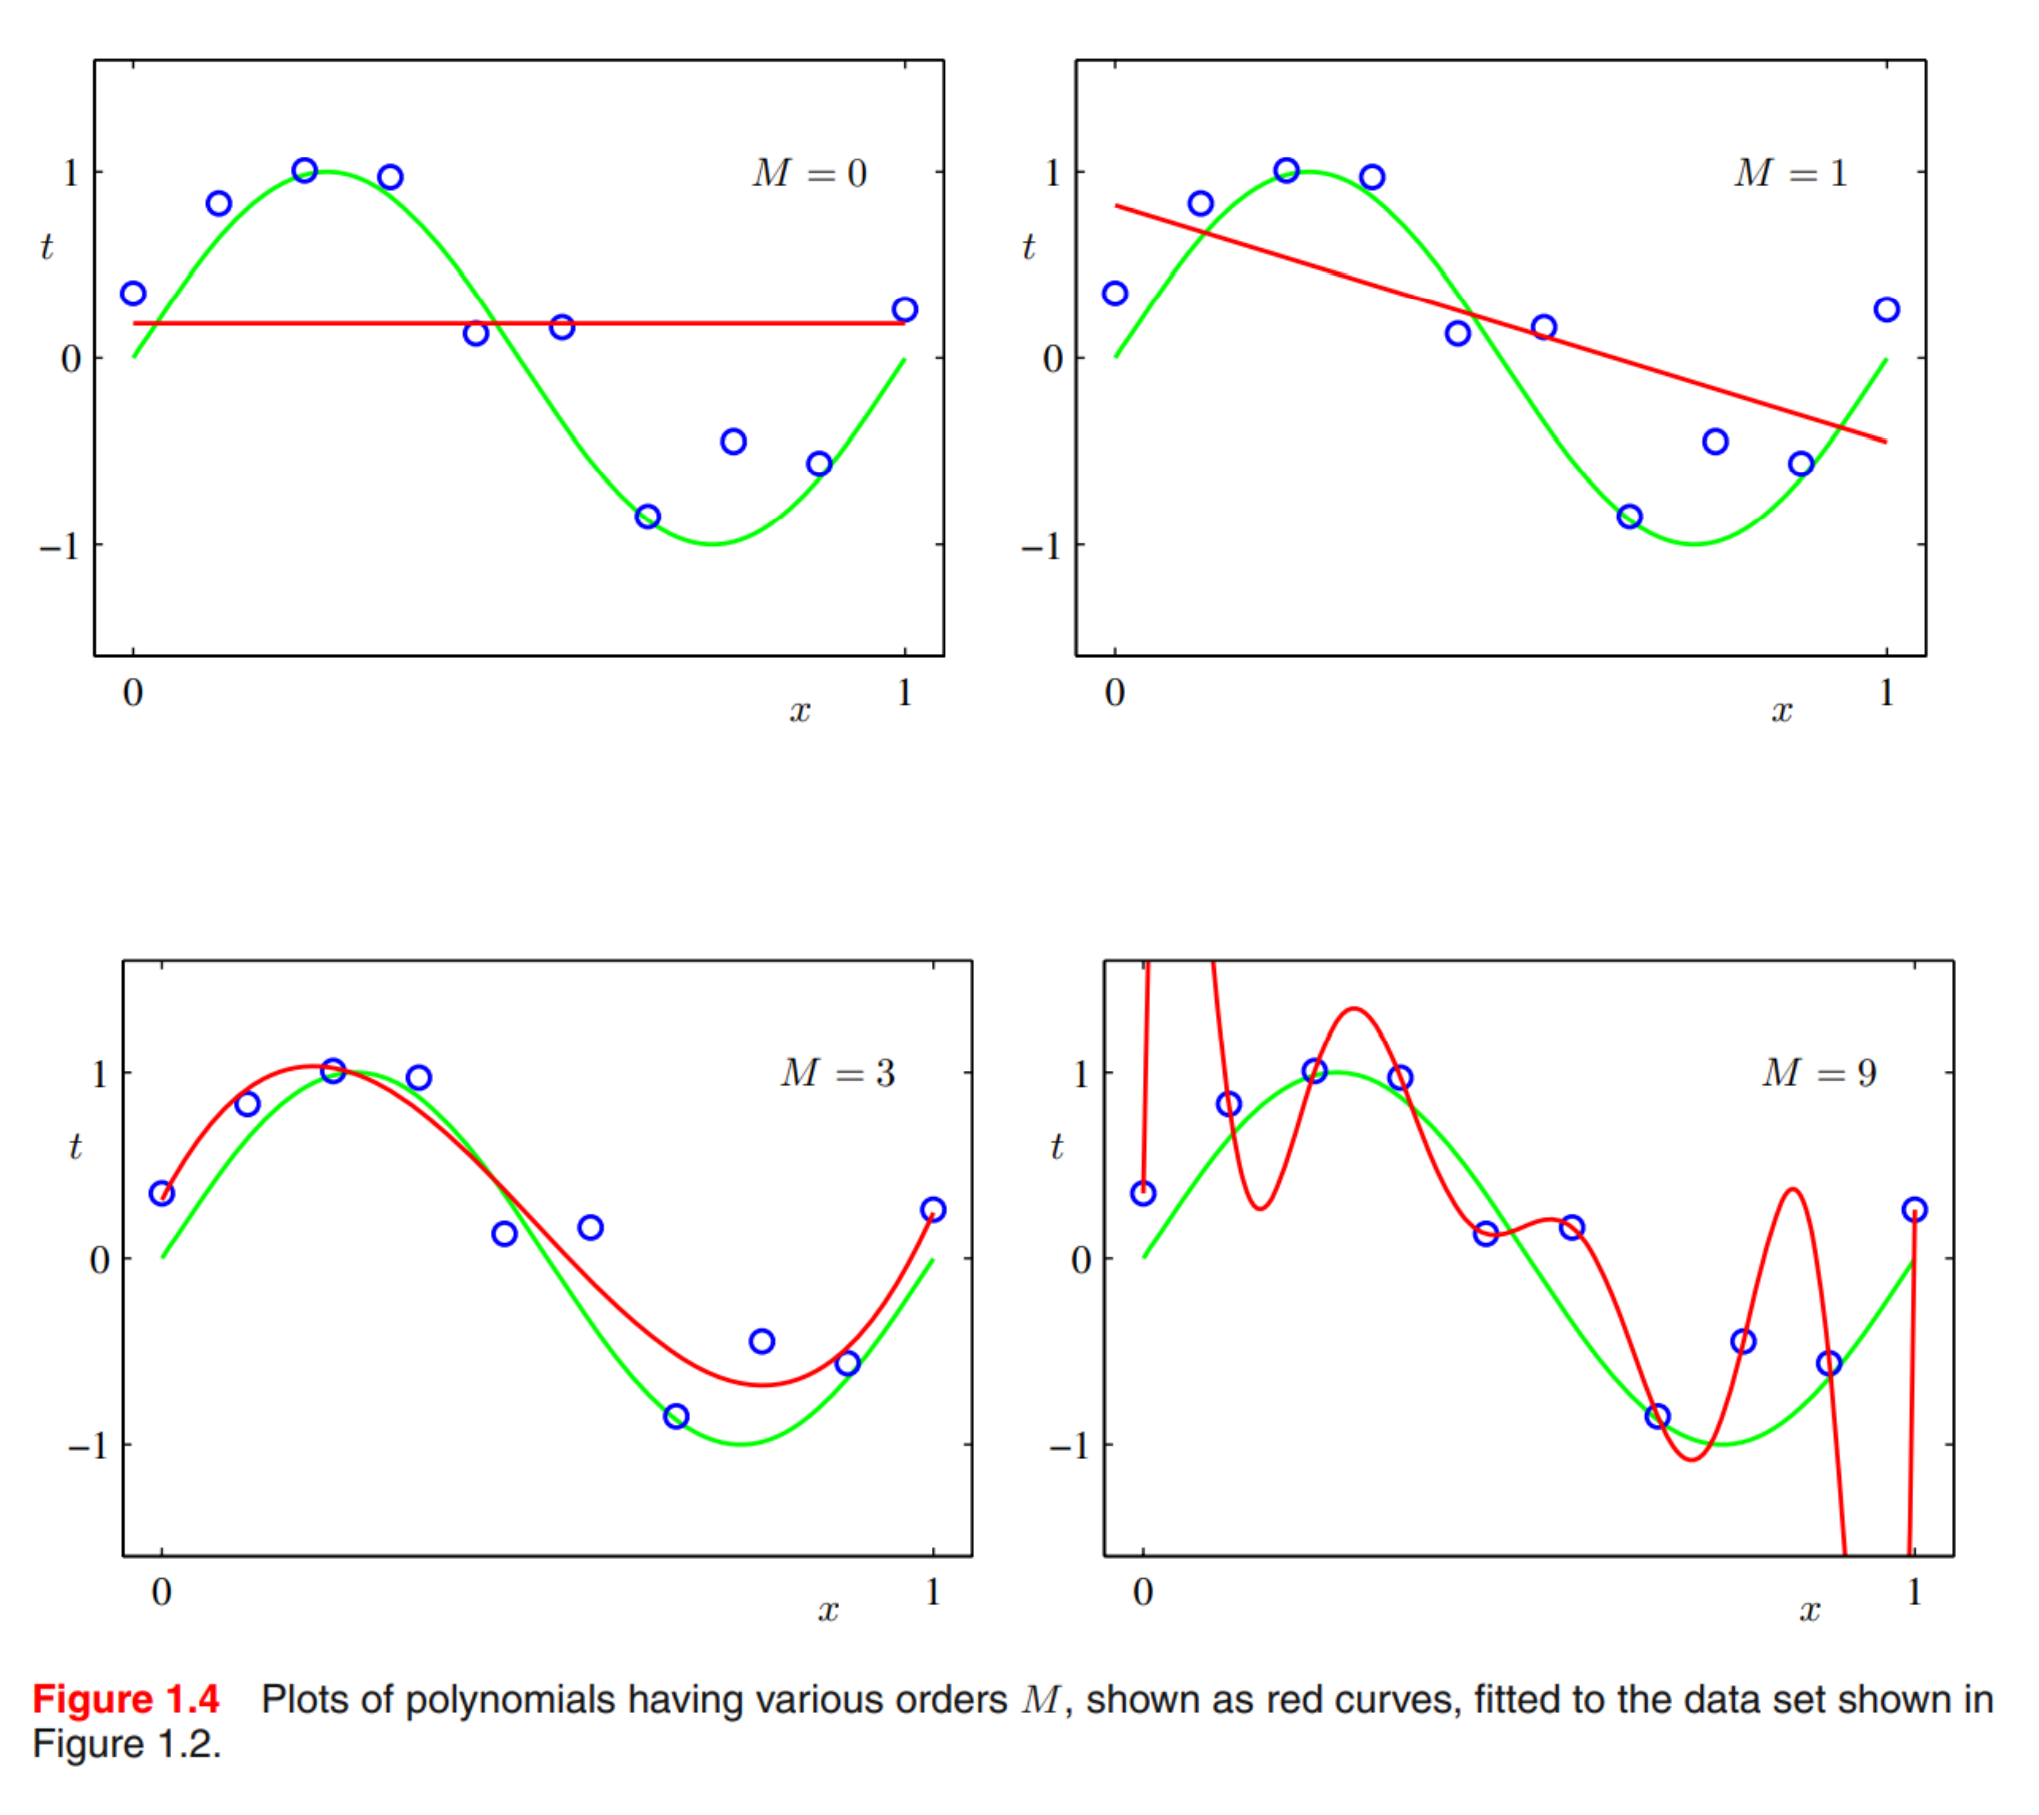
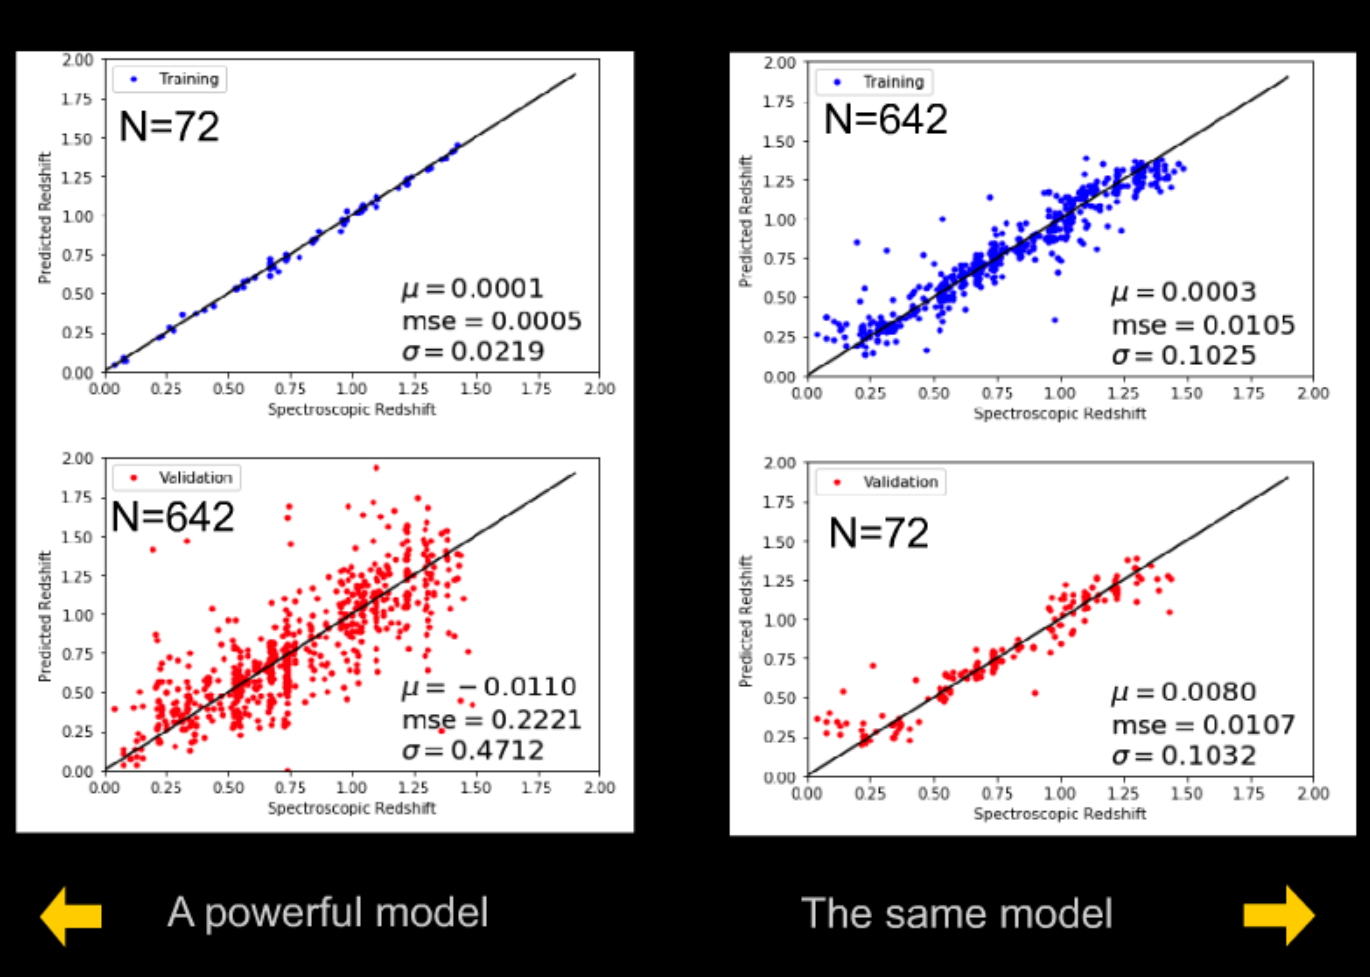
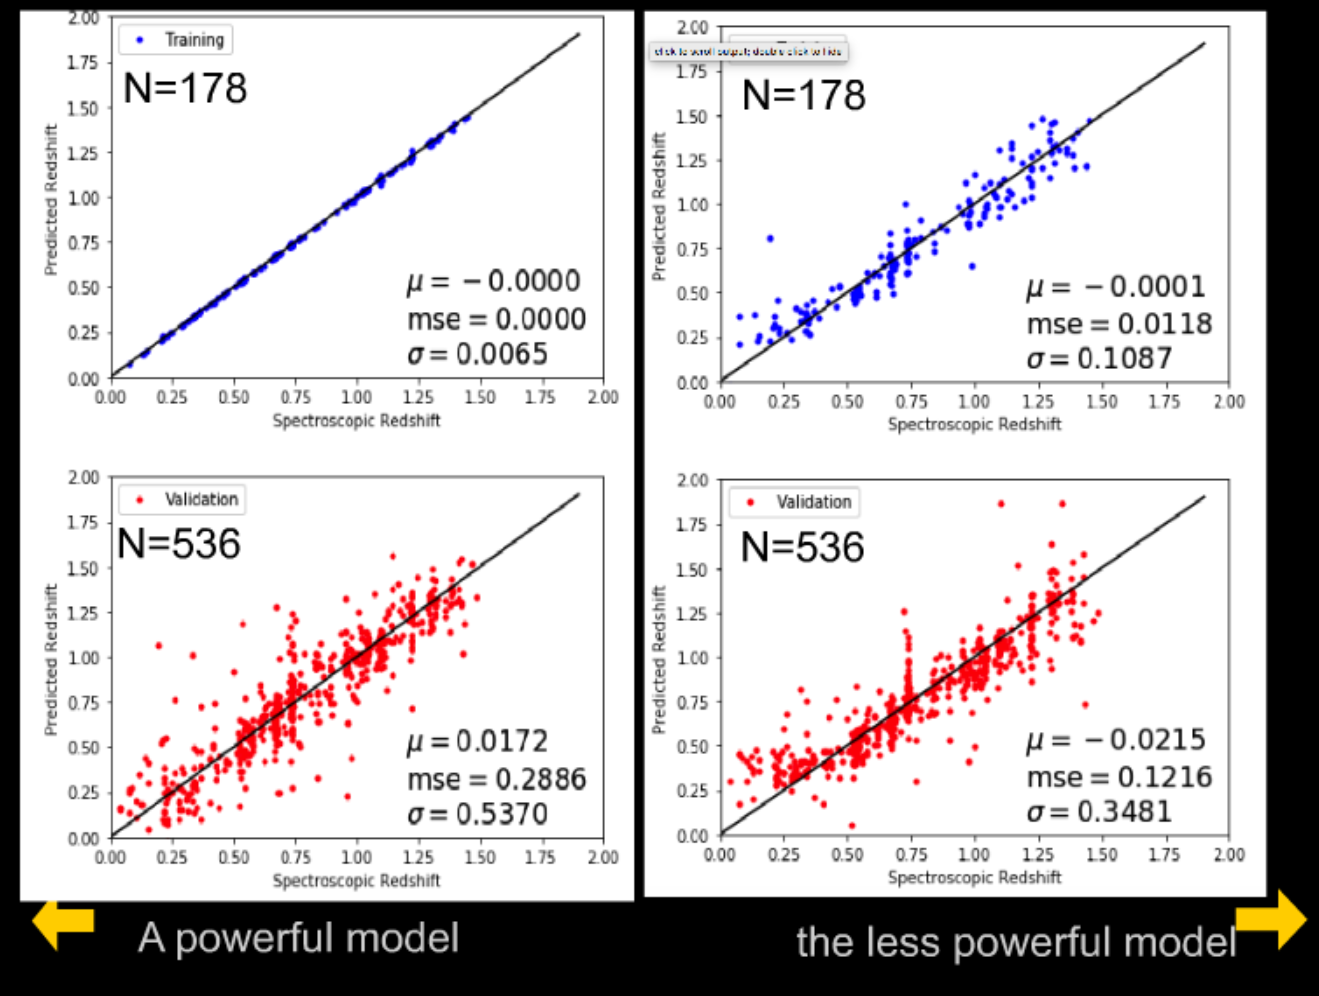
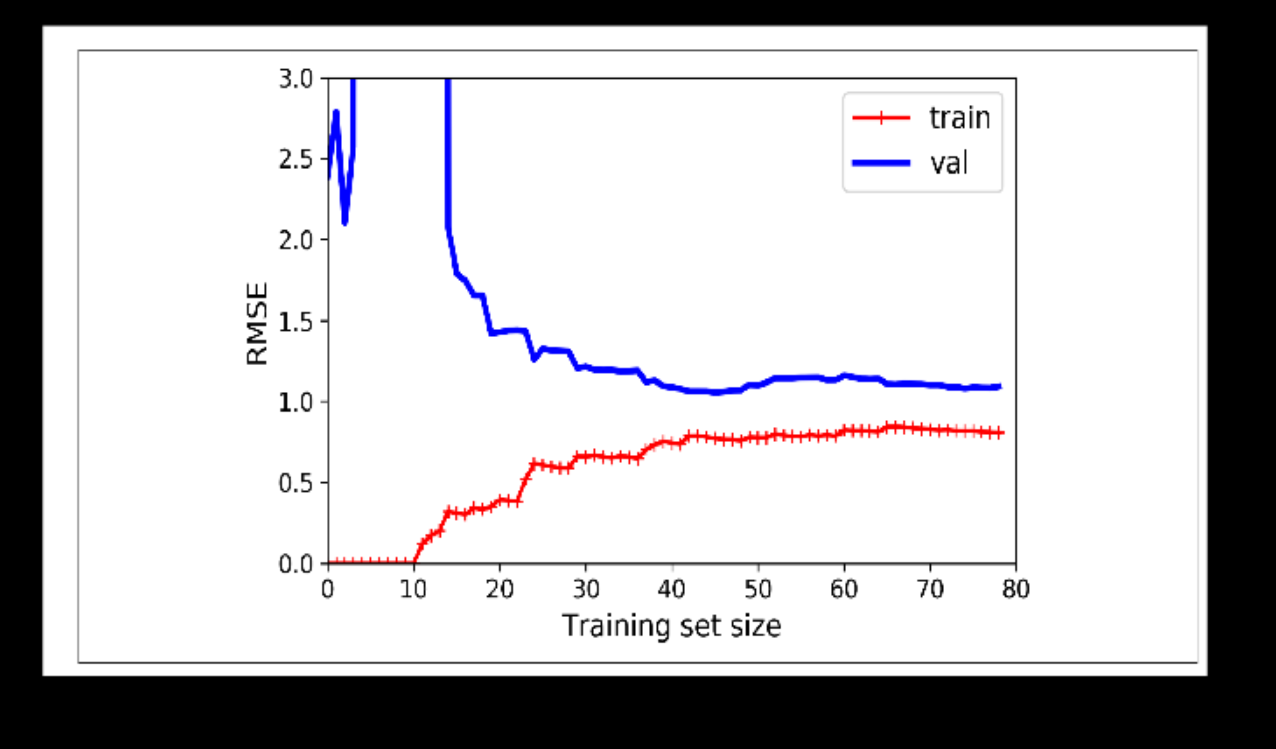
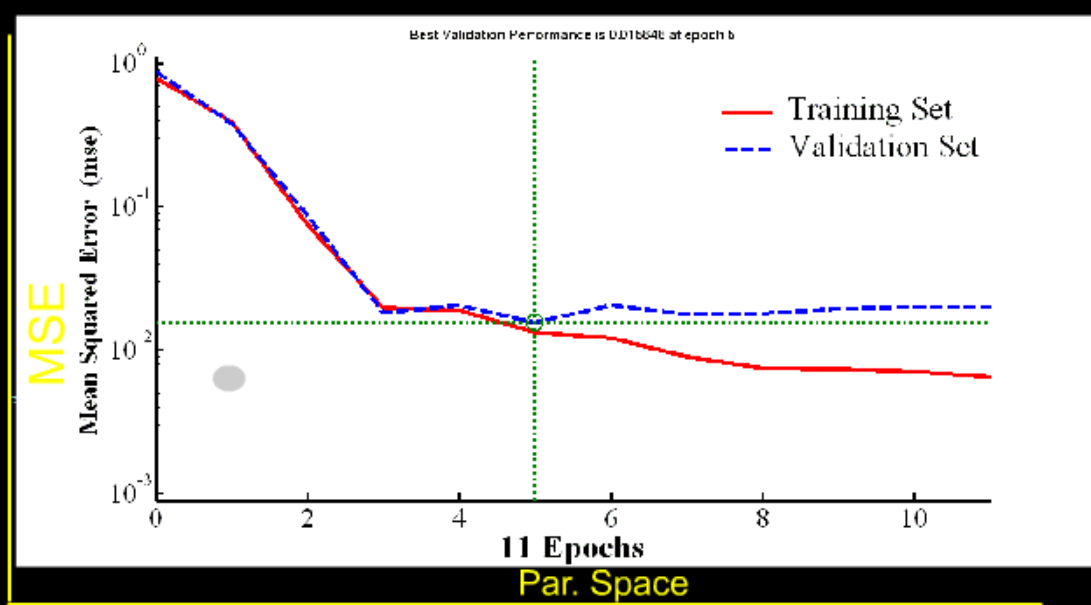
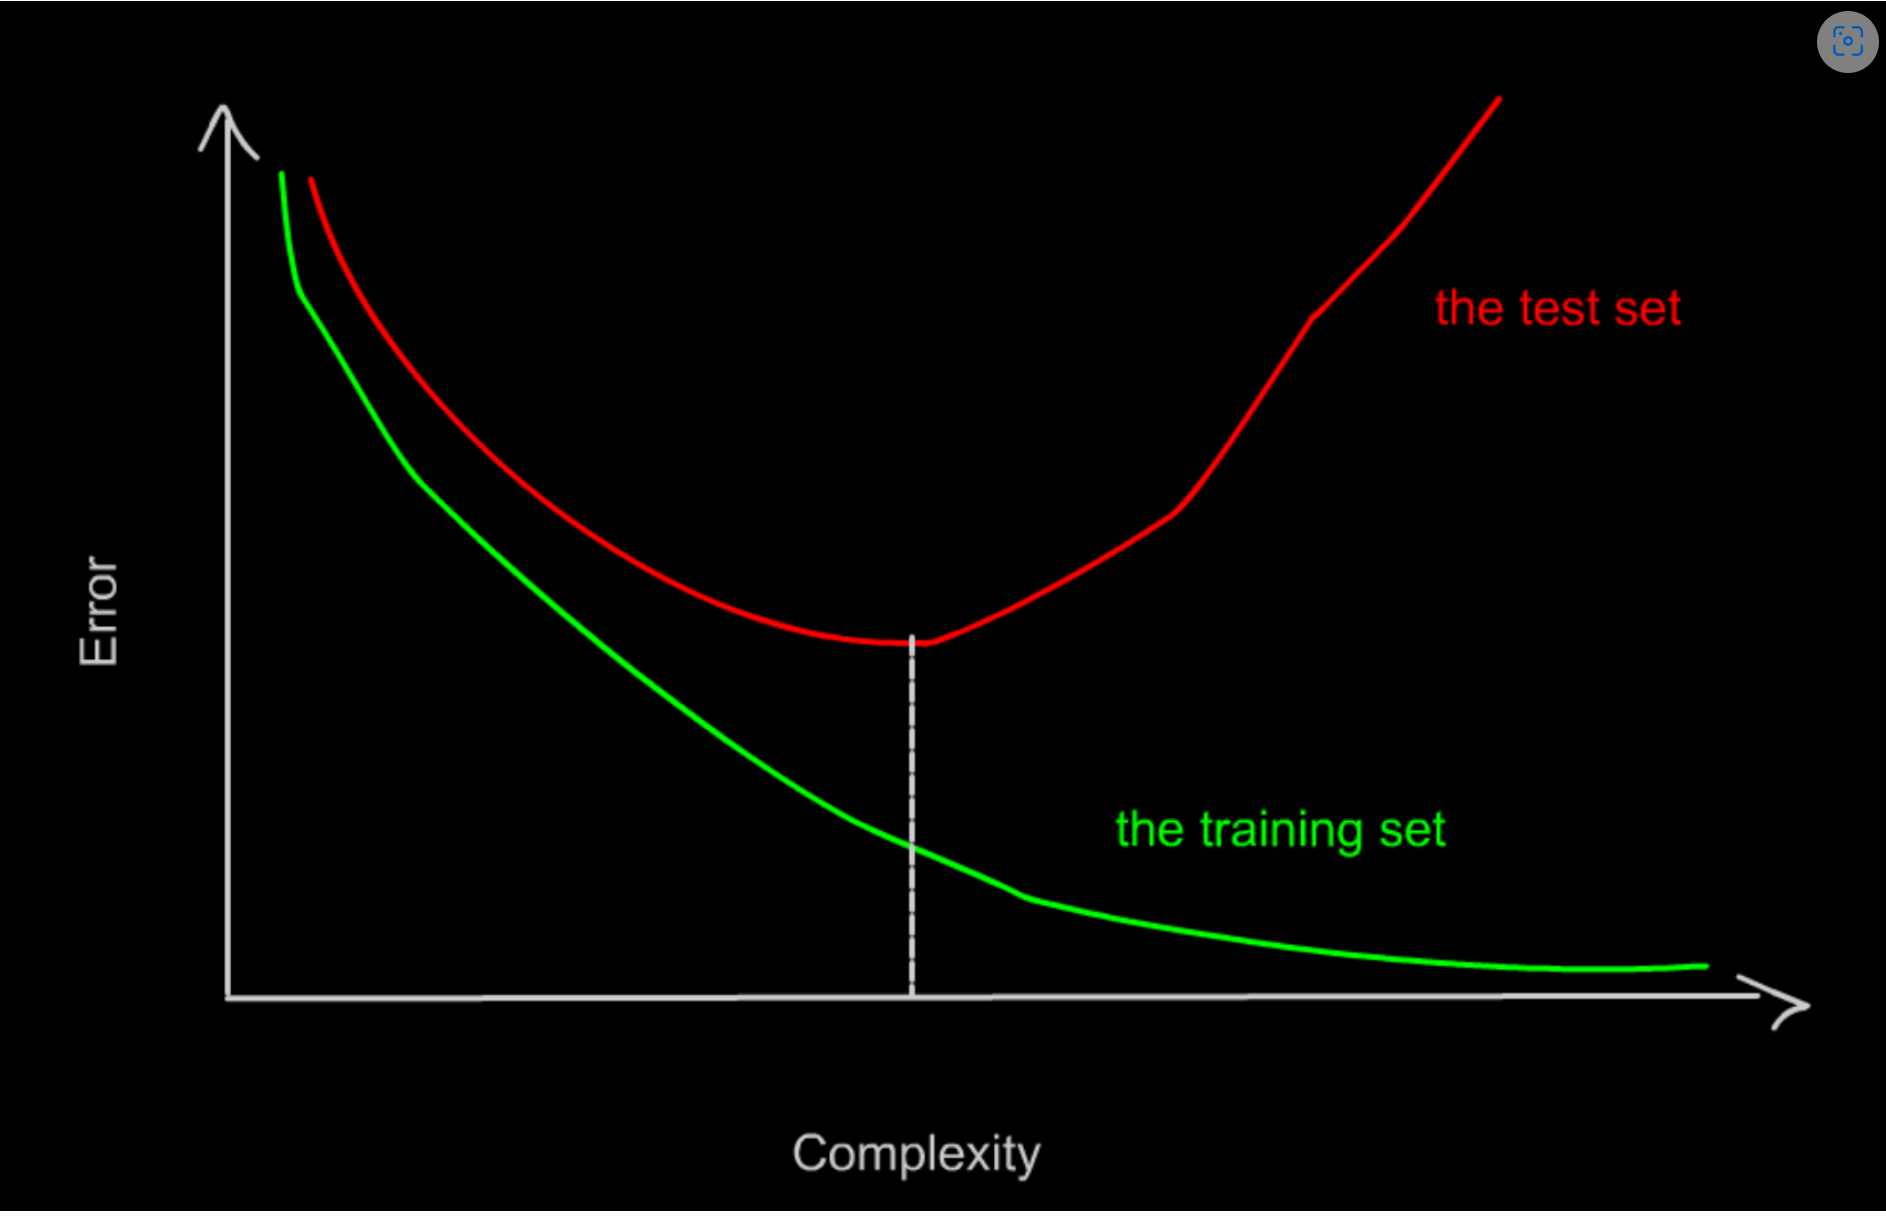

# -----------------------------------------------------------------------------------

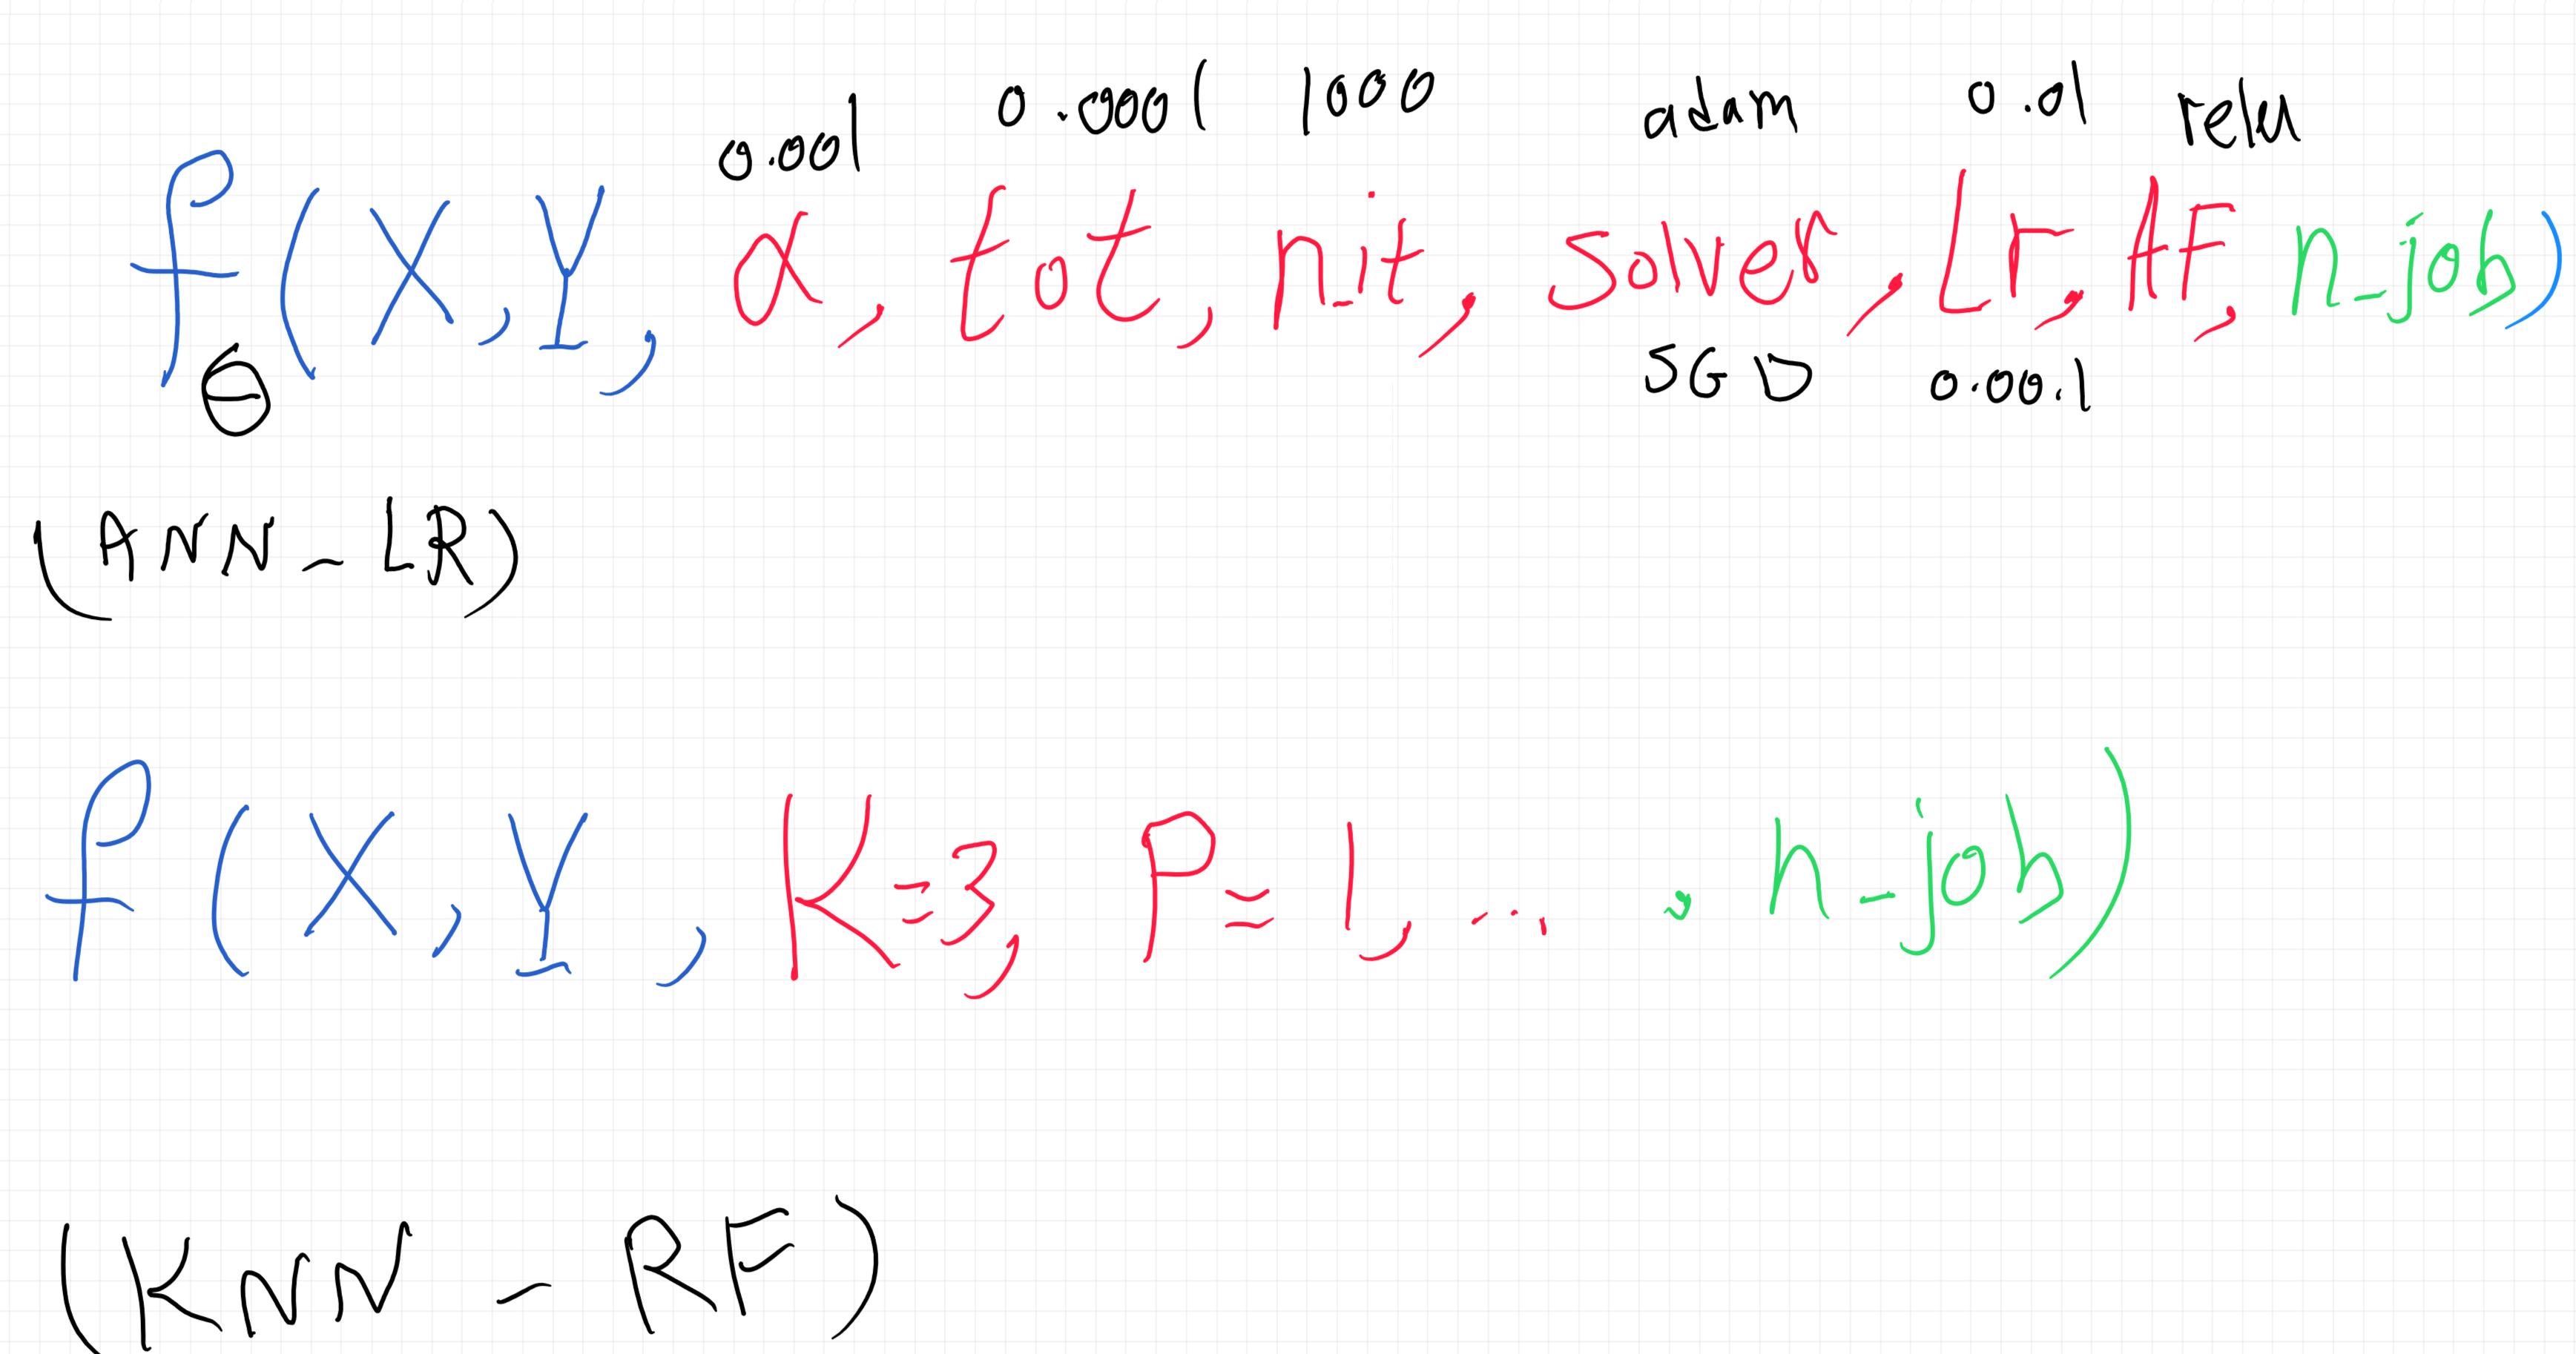

# -----------------------------------------------------------------------------------

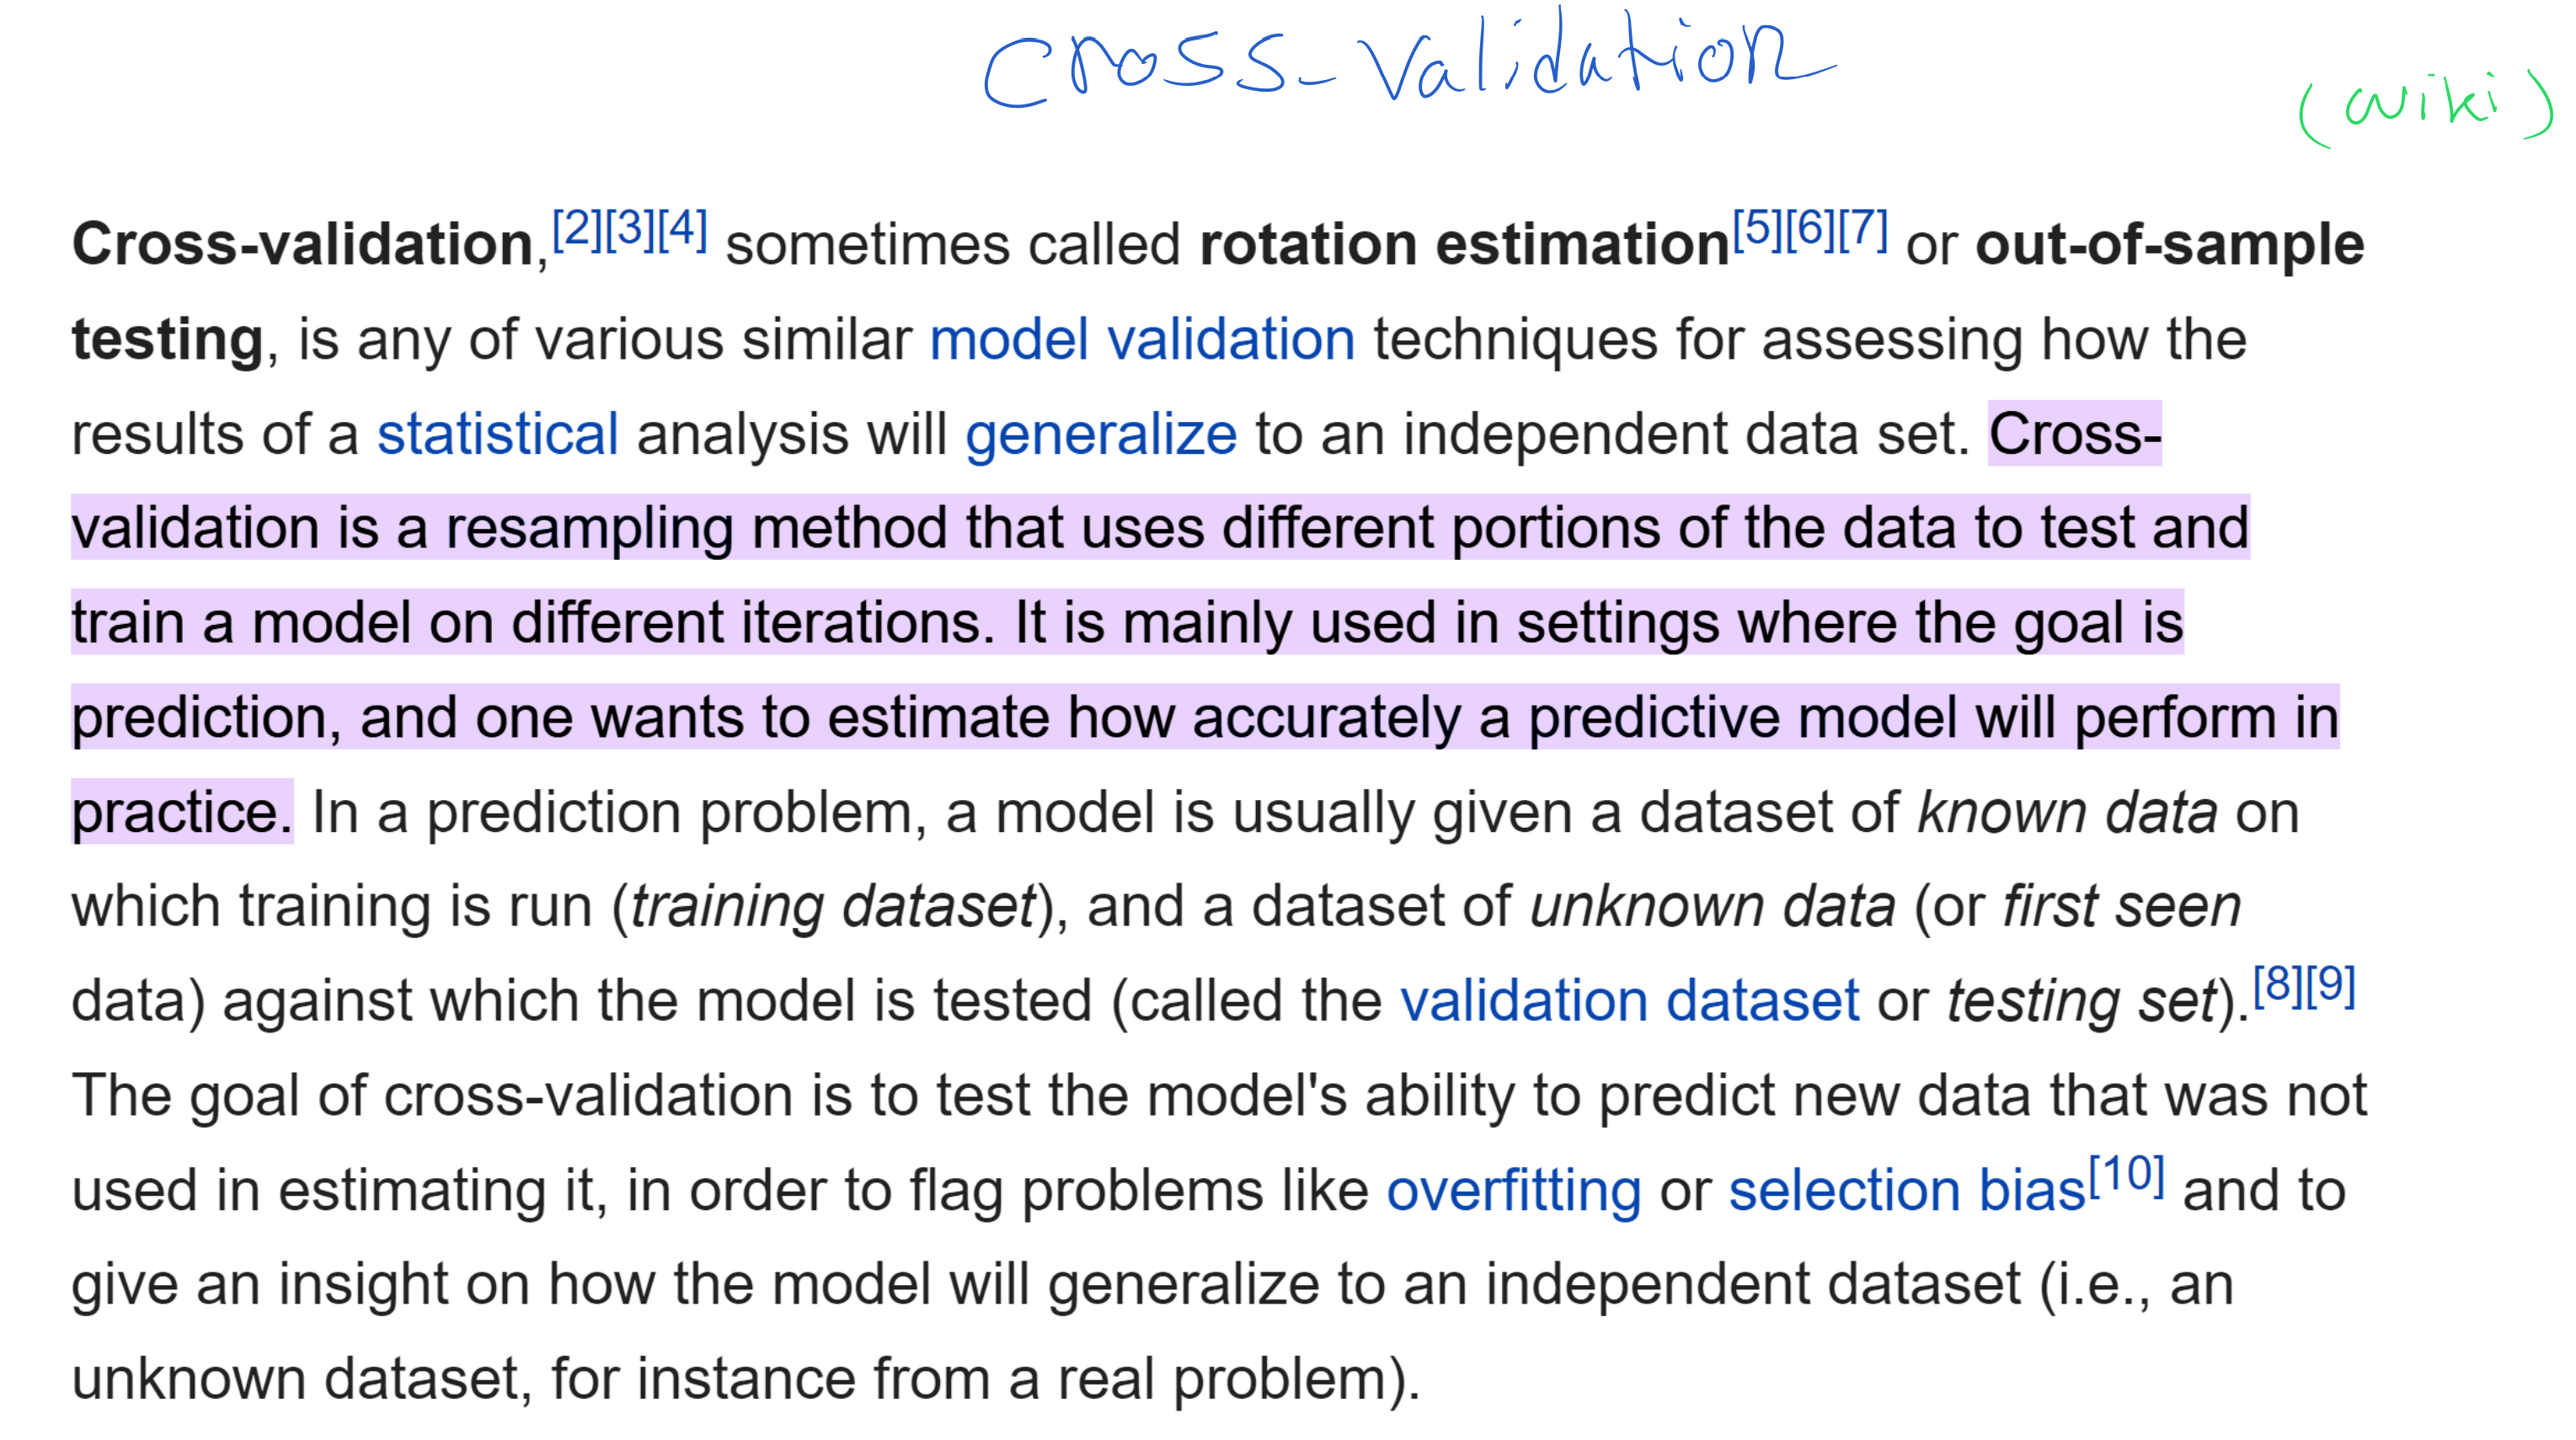
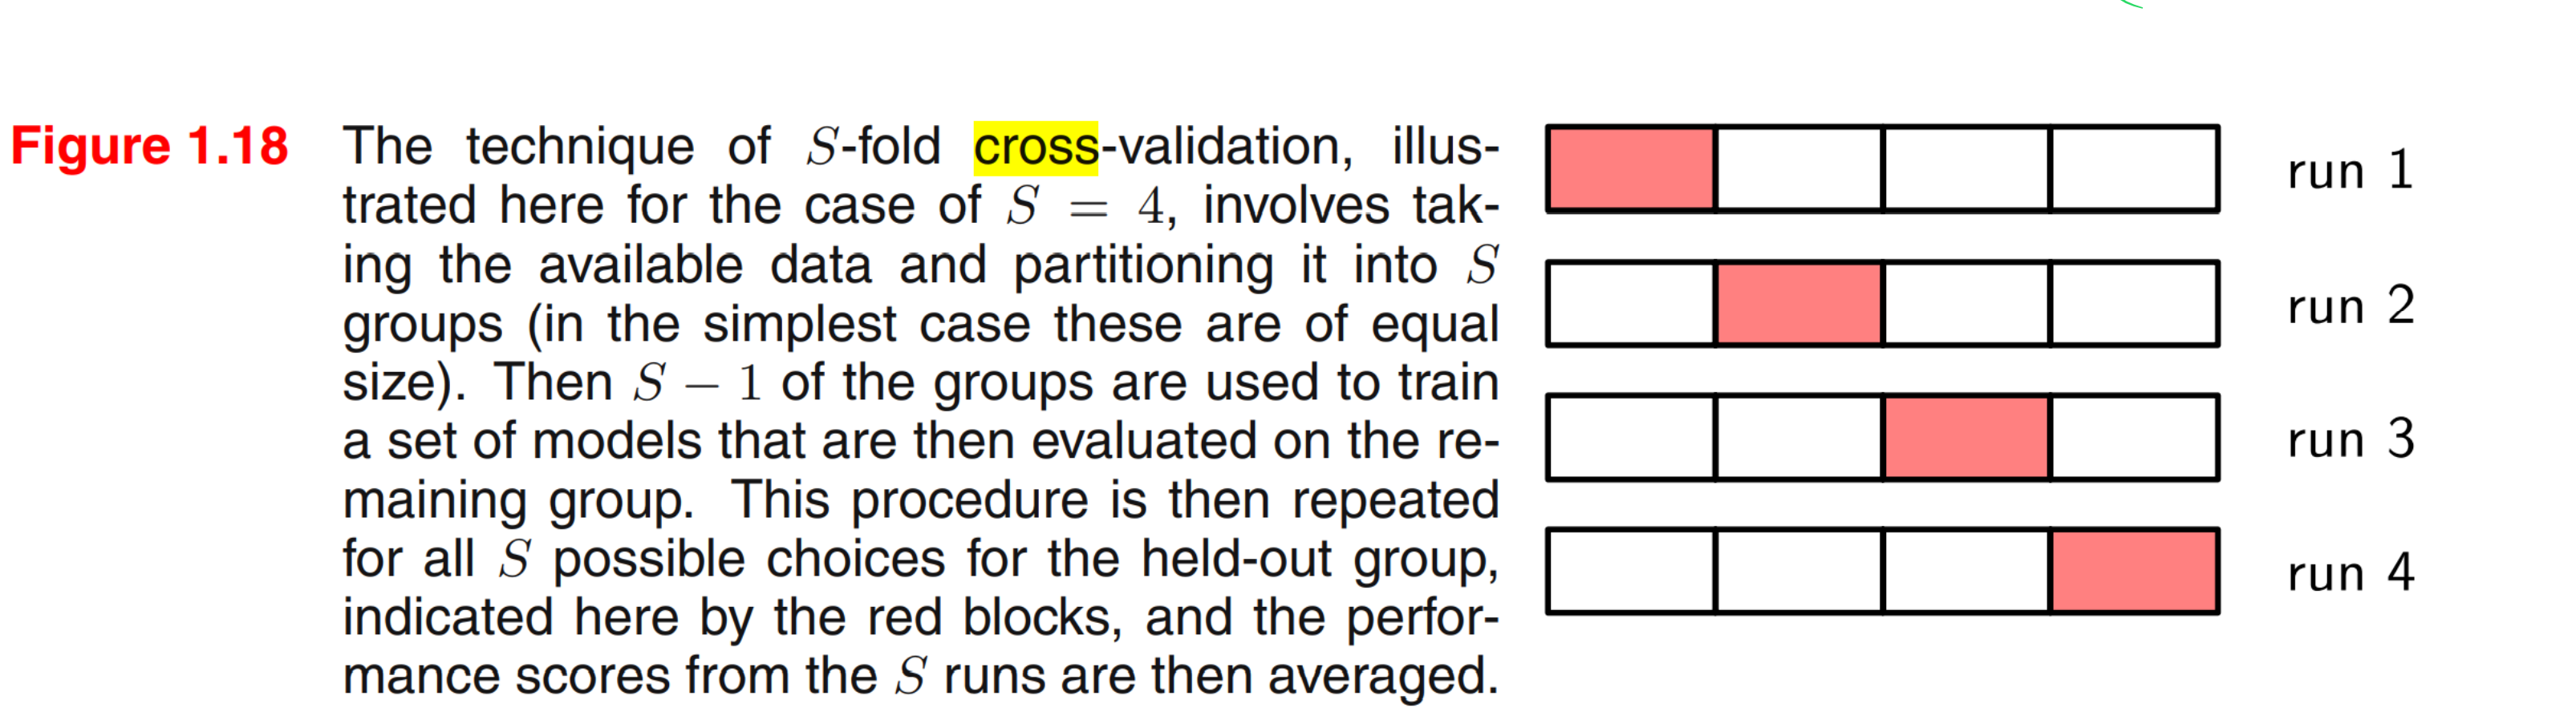

# Load the general packages you might need

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
print('Done!')

Done!


# load your data 

In [4]:
X=np.load('inp_alfalfa.npy')  # load the input
Y=np.load('tar_alfalfa.npy')  # load the target
print(np.shape(X),np.shape(Y))
print ('Done!')

(13674, 15) (13674,)
Done!


# Split the data

In [5]:
from sklearn.model_selection import train_test_split

X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y ,test_size=0.1 )

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

training set ==  (12306, 15) (12306,) ,, validation set ==  (1368, 15) (1368,)


# Normalize the data

In [6]:

scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3

X_va_Norm= scaler_S.transform(X_va)  # Line #4

print('Done!')

Done!


# Grid Search (load new packages)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


# set up th pipeline
knn_pipeline = Pipeline([('KNN', KNeighborsClassifier())])

# choose the parameters that you would like to optimize:

params = [{'KNN__n_neighbors': [ 9,11,13,15,30,50,100],
         'KNN__p': [1, 2],
          }]
# # use GridSearchCV and the right meteric for classification or regression
gs_knn = GridSearchCV(knn_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
# run pipleline and fit the model
gs_knn.fit(X_tr_Norm, Y_tr)

#The best parameters of the optimization
gs_knn.best_params_



{'KNN__n_neighbors': 50, 'KNN__p': 1}

In [8]:
knn_pipeline = Pipeline([('PCA', PCA()),
                         ('KNN', KNeighborsClassifier() )])

params = [{'PCA__n_components':[.7, .9, .999], 'KNN__n_neighbors': [15,30,50,100],
         'KNN__p': [1, 2],
          }]

gs_knn = GridSearchCV(knn_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_knn.fit(X_tr_Norm, Y_tr)

gs_knn.best_params_

{'KNN__n_neighbors': 50, 'KNN__p': 1, 'PCA__n_components': 0.999}

In [9]:
knn_pipeline = Pipeline([('PCA', PCA()),
                         ('KNN', KNeighborsClassifier() )])

params = [{'PCA__n_components':[.7, .9, .999], 'KNN__n_neighbors': [15,30,50,100],
         'KNN__p': [1, 2],
          }]

gs_knn = GridSearchCV(knn_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_knn.fit(X_tr_Norm, Y_tr)

gs_knn.best_params_

{'KNN__n_neighbors': 50, 'KNN__p': 1, 'PCA__n_components': 0.999}

# Regression with ANN

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [11]:
# reg = MLPRegressor(hidden_layer_sizes=(100,50,), max_iter=50000, 
#                        activation='relu',solver='adam',tol=.00000001,alpha=.00007,early_stopping=True, 
#                        validation_fraction=0.1, learning_rate= 'constant',learning_rate_init=.001)

ANN_cls_pipeline = Pipeline([('ANNcls', MLPClassifier())])

params = [{'ANNcls__solver':['adam','sgd','lbfgs']}]

gs_ann_cls = GridSearchCV(ANN_cls_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_ann_cls.fit(X_tr_Norm, Y_tr)

gs_ann_cls.best_params_

C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hteim\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hteim\anaconda3\envs\tf\lib\sit

{'ANNcls__solver': 'adam'}

In [12]:
X=np.load('inp_redshift.npy')  # load the input
Y=np.load('tar_redshift.npy')  # load the target
print(np.shape(X),np.shape(Y))
print ('Done!')

(713, 7) (713,)
Done!


In [13]:
#clf = MLPClassifier(solver='adam', alpha=1e-5,
#                    hidden_layer_sizes=(100,50), max_iter=1,
#                   early_stopping=False, validation_fraction=0.1 )


ANN_reg_pipeline = Pipeline([('STD', StandardScaler()),('ANNreg', MLPRegressor())])

params = [{'ANNreg__alpha':[1, .1, .01, .001,.0001],'ANNreg__solver': ['adam'], 'ANNreg__hidden_layer_sizes':[(20,20)]}]

gs_ann_reg = GridSearchCV(ANN_reg_pipeline,
                      param_grid=params,
                      scoring='neg_root_mean_squared_error',
                      cv=5)
#,'ANNreg__solver': 'lbfgs', 'ANNreg__hidden_layer_sizes':(20,20)
gs_ann_reg.fit(X_tr_Norm, Y_tr)

gs_ann_reg.best_params_

{'ANNreg__alpha': 0.1,
 'ANNreg__hidden_layer_sizes': (20, 20),
 'ANNreg__solver': 'adam'}

# Use ANN regression and find the best alpha and solver
# Do the same with ANN classification
# Do classification with KNN and finf the best K and P
# Do the same with KNN regession
